 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#Creating a path to the whale_returns.csv file

csvpath = Path("Resources/whale_returns.csv")

In [3]:
#Reading the CSV file into a DataFrame using Pandas

whale_returns_df = pd.read_csv(csvpath)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
#Converting the dates to a DateTimeIndex

whale_returns_df = whale_returns_df.set_index(pd.to_datetime(whale_returns_df["Date"],infer_datetime_format=True))

#Dropping the Extra Date column
whale_returns_df = whale_returns_df.drop(columns = ["Date"])
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna().copy()
# Checking for nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
csvpath = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(csvpath)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
#Converting the dates to a DateTimeIndex

algo_returns_df = algo_returns_df.set_index(pd.to_datetime(algo_returns_df["Date"],infer_datetime_format=True))

#Dropping the Extra Date column
algo_returns_df = algo_returns_df.drop(columns = ["Date"])
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
# Checking for nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
csvpath = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(csvpath)
sp_tsx_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [12]:
#Converting the dates to a DateTimeIndex

sp_tsx_df = sp_tsx_df.set_index(pd.to_datetime(sp_tsx_df["Date"],infer_datetime_format=True))

#Dropping the Extra Date column
sp_tsx_df = sp_tsx_df.drop(columns = ["Date"])
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
#Replacing currency symbols 

sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")
sp_tsx_df.head()

<ipython-input-13-f6a64371894a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [15]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
sp_tsx_df.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [17]:
# Drop nulls
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna().copy()
# Checking for nulls
sp_tsx_daily_returns.isnull().sum()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns = {"Close":"S&P TSX 60"})
sp_tsx_daily_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios_returns = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_daily_returns], axis="columns", join="inner")
all_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

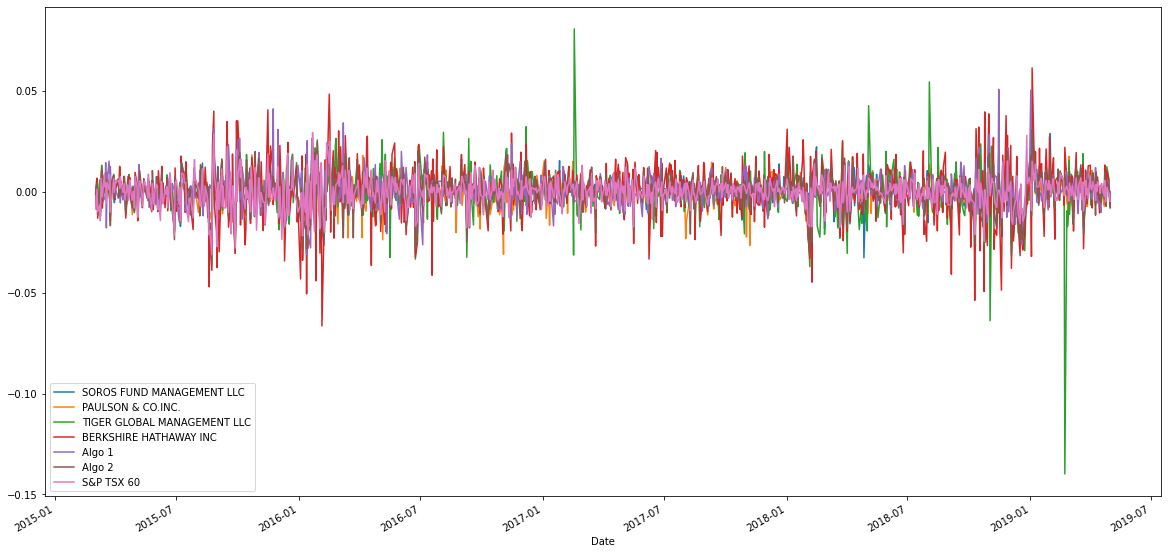

In [20]:
# Plot daily returns of all portfolios
all_portfolios_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

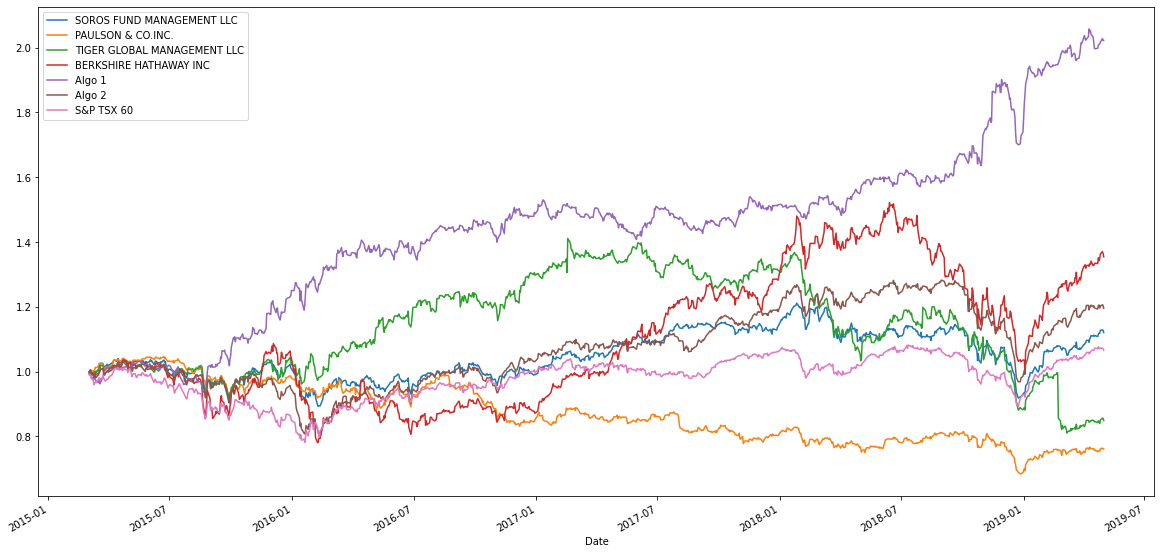

In [21]:
# Calculate cumulative returns of all portfolios
cumul_returns = (1+all_portfolios_returns).cumprod()
# Plot cumulative returns
cumul_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

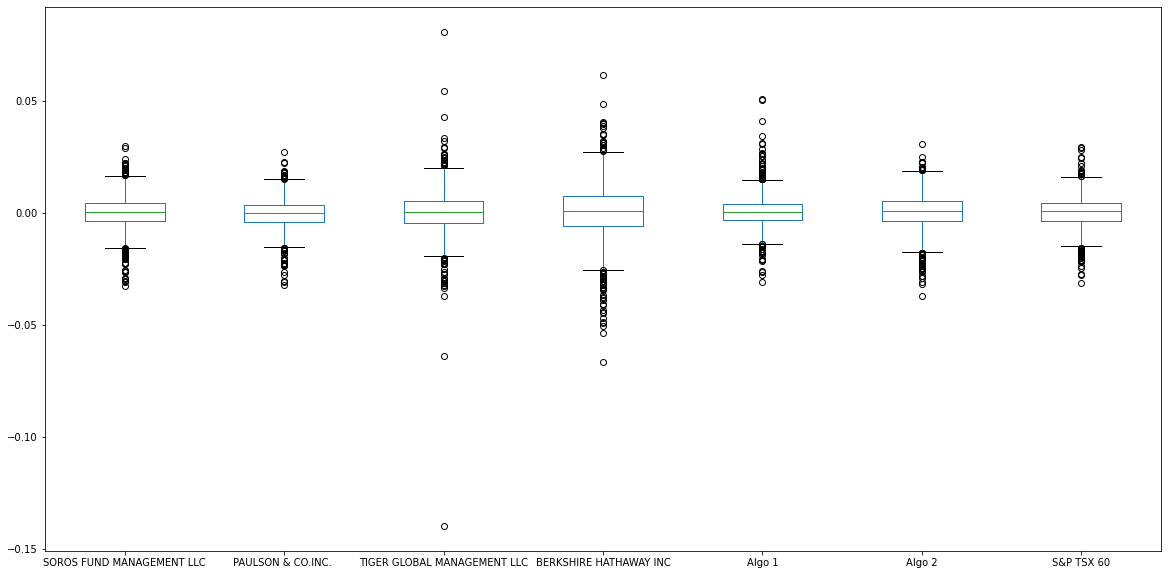

In [22]:
# Box plot to visually show risk
all_portfolios_returns.plot(kind = "box",figsize = (20,10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios and sort values in descending order
all_returns_std = all_portfolios_returns.std().sort_values(ascending=False)
all_returns_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Determine which portfolios are riskier than the S&P TSX 60
portfolio_riskier_sp_tsx_60 = [all_returns_std > all_returns_std["S&P TSX 60"]]
portfolio_riskier_sp_tsx_60

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 S&P TSX 60                     False
 PAULSON & CO.INC.              False
 dtype: bool]

In [25]:
##BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC, Algo 2, SOROS FUND MANAGEMENT LLC and Algo 1 are riskier than S&P TSX 60.         True

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_returns_std *np.sqrt(252)
annualized_std.sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

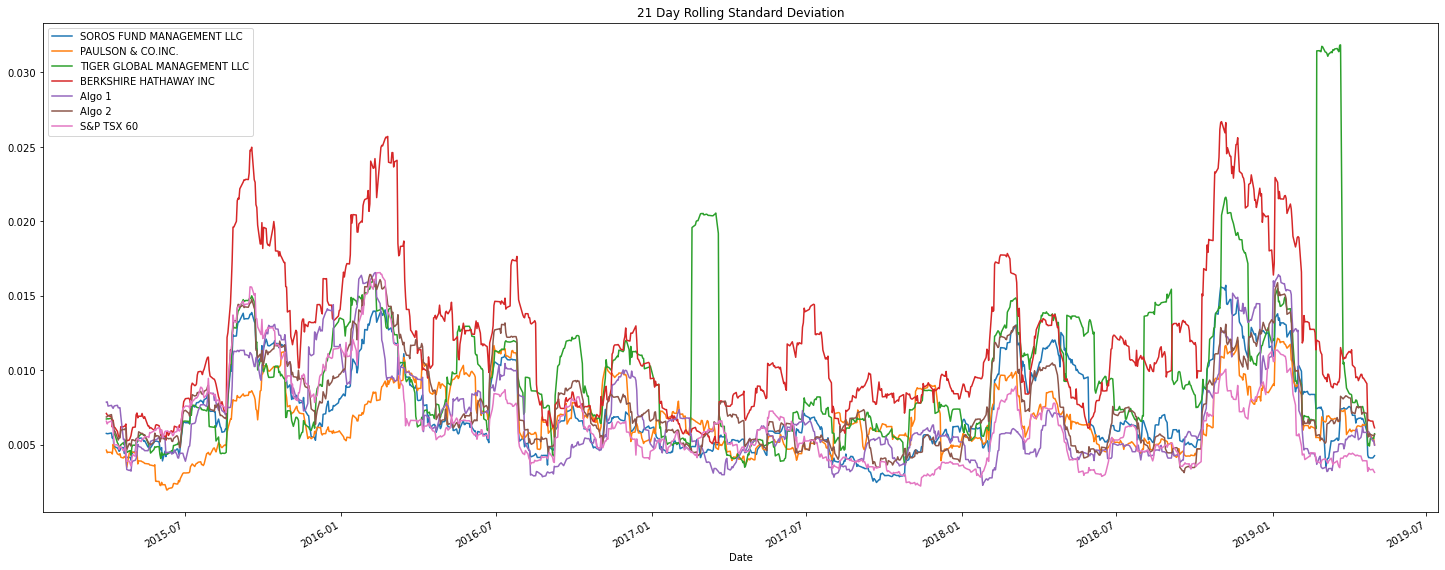

In [27]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation",figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

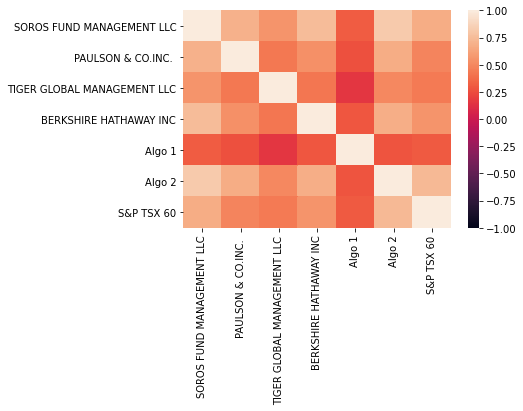

In [28]:
# Calculate the correlation and display the correlation matrix
correlation = all_portfolios_returns.corr()
correlation
#Plot correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Algo 1 Rolling 60-Day Beta'}, xlabel='Date'>

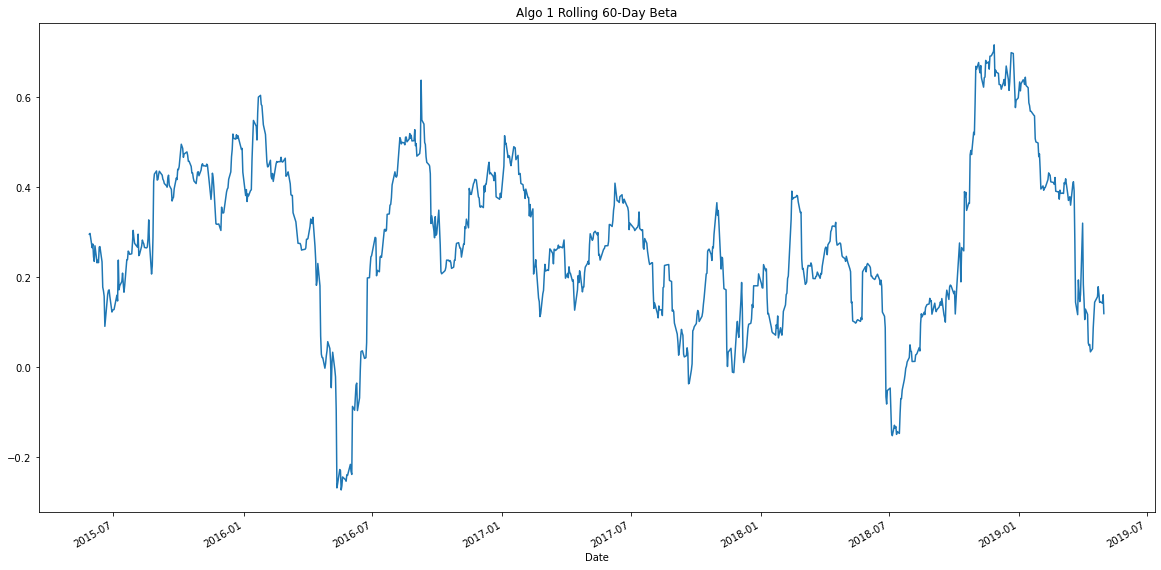

In [29]:
# Calculate covariance of a single portfolio
rolling_covariance_algo_1= all_portfolios_returns["Algo 1"].rolling(window=60).cov(all_portfolios_returns["S&P TSX 60"])
# Calculate variance of S&P TSX
rolling_variance_sp_tsx_60 = all_portfolios_returns["S&P TSX 60"].rolling(window=60).var()
# Computing beta
rolling_beta_algo_1 = rolling_covariance_algo_1/rolling_variance_sp_tsx_60
# Plot beta trend
rolling_beta_algo_1.plot(title="Algo 1 Rolling 60-Day Beta", figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

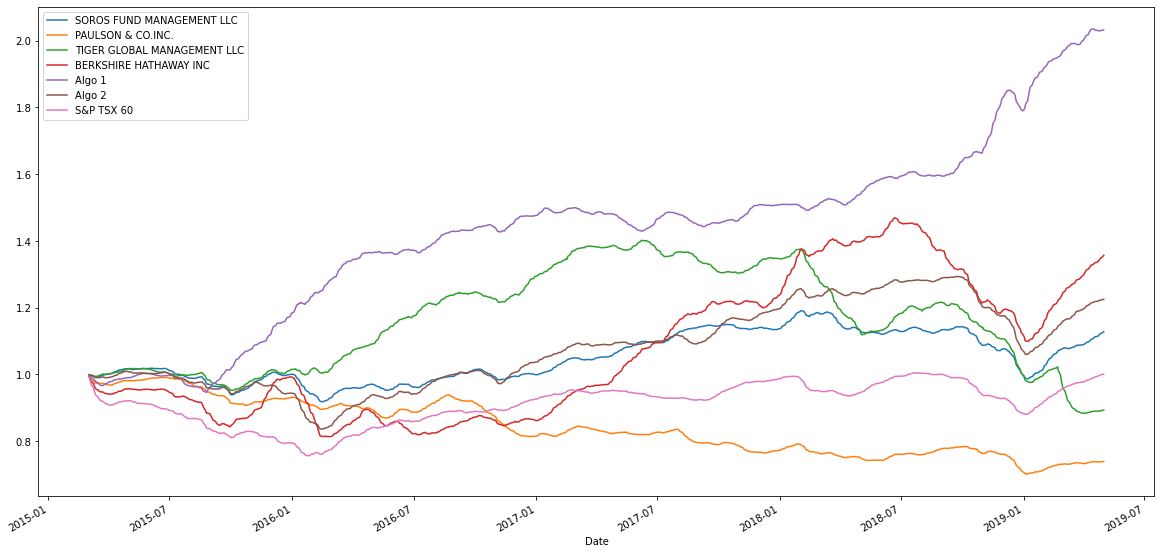

In [30]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = all_portfolios_returns.ewm(span = 21,adjust = False).mean()
(1+portfolio_ewm).cumprod().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratios = all_portfolios_returns.mean()*252/(all_portfolios_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

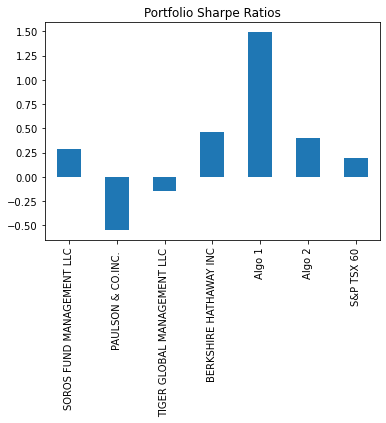

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Portfolio Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 outperformed both the market(S&P TSX 60) and the whale portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [41]:
# Reading data from 1st stock
tsla_df = pd.read_csv(Path("Resources/tsla_google_finance_1.csv"),index_col="Date",parse_dates = True, infer_datetime_format = True)
tsla_df.rename(columns={"Close":"TSLA"}, inplace = True)
tsla_df.head()

,TSLA
Date,
2015-02-03,43.67
2015-02-04,43.71
2015-02-05,44.20
2015-02-06,43.47
2015-02-09,43.50


In [42]:
# Reading data from 2nd stock
pypl_df = pd.read_csv(Path("Resources/pypl_google_finance_1 .csv"),index_col="Date",parse_dates = True, infer_datetime_format = True)
pypl_df.rename(columns={"Close":"PYPL"}, inplace = True)
pypl_df.head()

,PYPL
Date,
2015-07-06,36.71
2015-07-07,36.62
2015-07-08,34.70
2015-07-09,34.50
2015-07-10,34.69


In [43]:
# Reading data from 3rd stock
amzn_df = pd.read_csv(Path("Resources/amzn_google_finance_1.csv"),index_col="Date",parse_dates = True, infer_datetime_format = True)
amzn_df.rename(columns={"Close":"AMZN"}, inplace = True)
amzn_df.head()

,AMZN
Date,
2015-02-03,363.55
2015-02-04,364.75
2015-02-05,373.89
2015-02-06,374.28
2015-02-09,370.56


In [44]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat((tsla_df,pypl_df,amzn_df),axis = 1, join = "inner")
all_stocks.sort_index(ascending = True, inplace = True)
all_stocks.head()

,TSLA,PYPL,AMZN
Date,,,
2015-07-06,55.94,36.71,436.04
2015-07-07,53.58,36.62,436.72
2015-07-08,50.99,34.70,429.70
2015-07-09,51.58,34.50,434.39
2015-07-10,51.83,34.69,443.51


In [45]:
# Reset Date index
all_stocks.index = all_stocks.index.normalize()

In [46]:
# Calculate daily returns
portfolio_returns = all_stocks.pct_change()
# Drop NAs
portfolio_returns.dropna(inplace = True)
# Display sample data
portfolio_returns.head()

,TSLA,PYPL,AMZN
Date,,,
2015-07-07,-0.042188,-0.002452,0.001559
2015-07-08,-0.048339,-0.052430,-0.016074
2015-07-09,0.011571,-0.005764,0.010915
2015-07-10,0.004847,0.005507,0.020995
2015-07-13,0.011576,0.060248,0.027192


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weigh_returns = portfolio_returns.dot(weights)


# Display sample data
portfolio_weigh_returns.head()

Date
2015-07-07   -0.014360
2015-07-08   -0.038948
2015-07-09    0.005574
2015-07-10    0.010450
2015-07-13    0.033005
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolio_returns = pd.concat((all_portfolios_returns,portfolio_weigh_returns), axis = "columns", join = "inner")
joined_portfolio_returns.rename(columns = {0:"TSLA + PYPL + AMZN"},inplace = True)
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolio_returns.dropna(inplace = True)
joined_portfolio_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,TSLA + PYPL + AMZN
Date,,,,,,,,
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.002119,-0.014360
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.014526,-0.038948
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,-0.009269,0.005574
2015-07-10,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,0.009285,0.010450
2015-07-13,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,0.008476,0.033005
2015-07-14,0.004872,0.004467,0.002888,0.001856,0.005465,0.003058,0.004554,0.013127
2015-07-15,-0.008264,-0.004296,-0.002344,-0.010163,-0.009468,-0.004188,0.004307,-0.001038
2015-07-16,0.002683,-0.002170,0.003935,0.014835,-0.007925,0.007272,0.004692,0.024778
2015-07-17,-0.001662,-0.003665,0.001108,0.008452,-0.009170,-0.001352,-0.005990,0.013144


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized `std`
joined_portfolio_returns_annual_std = (joined_portfolio_returns.std())*np.sqrt(252)
joined_portfolio_returns_annual_std.sort_values(ascending = False)

TSLA + PYPL + AMZN             0.266962
BERKSHIRE HATHAWAY INC         0.213755
TIGER GLOBAL MANAGEMENT LLC    0.166529
Algo 2                         0.136941
SOROS FUND MANAGEMENT LLC      0.128813
Algo 1                         0.126152
S&P TSX 60                     0.115995
PAULSON & CO.INC.              0.115688
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

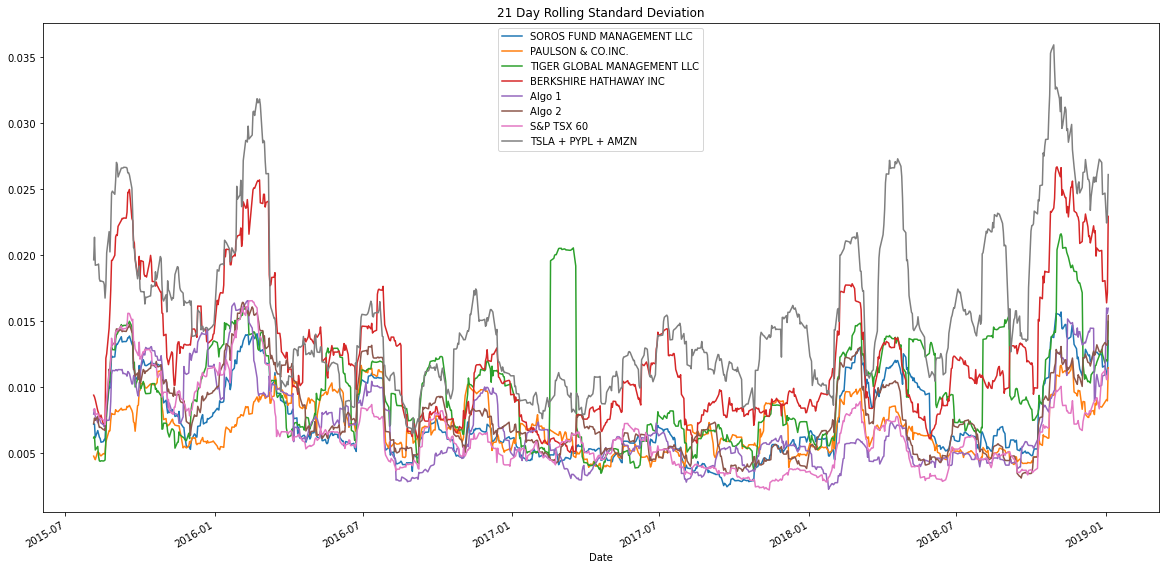

In [56]:
# Calculate rolling standard deviation
joined_portfolio_roll_std = joined_portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
joined_portfolio_roll_std. plot(title = "21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

In [58]:
# Calculate the correlation
joined_portfolio_corr = joined_portfolio_returns.corr()
joined_portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,TSLA + PYPL + AMZN
SOROS FUND MANAGEMENT LLC,1.000000,0.696393,0.603880,0.752950,0.334903,0.830314,0.675549,0.606898
PAULSON & CO.INC.,0.696393,1.000000,0.467959,0.538495,0.284656,0.674931,0.493927,0.443300
TIGER GLOBAL MANAGEMENT LLC,0.603880,0.467959,1.000000,0.476785,0.187960,0.558862,0.479980,0.450642
BERKSHIRE HATHAWAY INC,0.752950,0.538495,0.476785,1.000000,0.302462,0.680153,0.556057,0.675173
Algo 1,0.334903,0.284656,0.187960,0.302462,1.000000,0.307055,0.322907,0.227318
Algo 2,0.830314,0.674931,0.558862,0.680153,0.307055,1.000000,0.746277,0.574385
S&P TSX 60,0.675549,0.493927,0.479980,0.556057,0.322907,0.746277,1.000000,0.475578
TSLA + PYPL + AMZN,0.606898,0.443300,0.450642,0.675173,0.227318,0.574385,0.475578,1.000000


<AxesSubplot:>

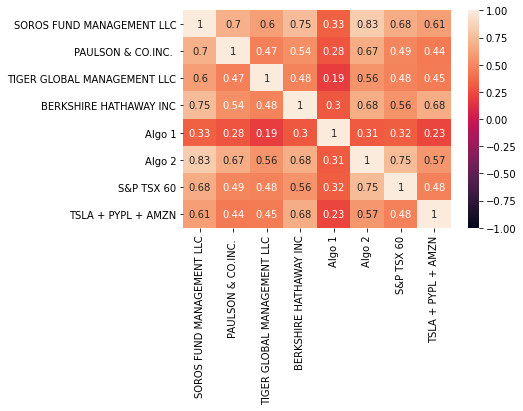

In [64]:
#Plot the correlation
sns.heatmap(joined_portfolio_corr, vmin = -1, vmax=1, annot = True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Portfolio (TSLA, PYPL, AMZN) Rolling 60-Day Beta'}, xlabel='Date'>

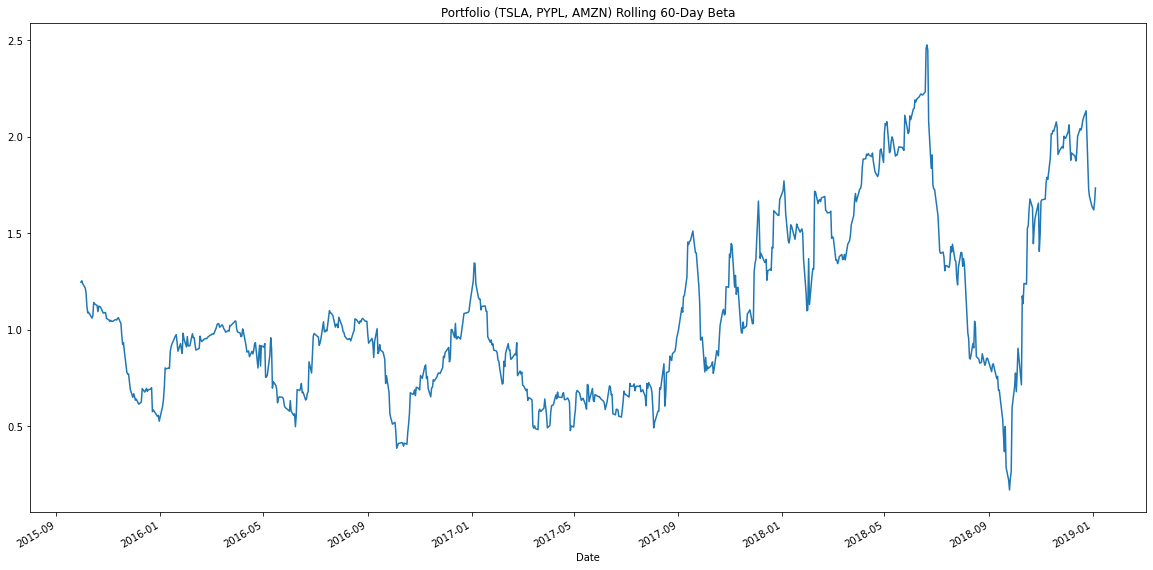

In [61]:
# Calculate Beta
rolling_covariance_joined_portfolio = joined_portfolio_returns["TSLA + PYPL + AMZN"].rolling(window=60).cov(all_portfolios_returns["S&P TSX 60"])
rolling_variance_sp_tsx_60_2 = joined_portfolio_returns["S&P TSX 60"].rolling(window=60).var()
rolling_beta_joined_portfolio = rolling_covariance_joined_portfolio/rolling_variance_sp_tsx_60_2
# Plot beta trend
rolling_beta_joined_portfolio.plot(title="Portfolio (TSLA, PYPL, AMZN) Rolling 60-Day Beta", figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:
# Calculate Annualized Sharpe Ratios
joined_portfolio_sharpe_ratios = (joined_portfolio_returns.mean()*252)/(joined_portfolio_returns.std()*np.sqrt(252))
joined_portfolio_sharpe_ratios.sort_values(ascending = False)

Algo 1                         1.525154
TSLA + PYPL + AMZN             0.996670
BERKSHIRE HATHAWAY INC         0.221749
Algo 2                         0.143573
S&P TSX 60                     0.006692
SOROS FUND MANAGEMENT LLC     -0.041376
TIGER GLOBAL MANAGEMENT LLC   -0.062183
PAULSON & CO.INC.             -0.869926
dtype: float64

<AxesSubplot:title={'center':'Portfolio (TSLA, PYPL, AMZN) Sharpe Ratios'}>

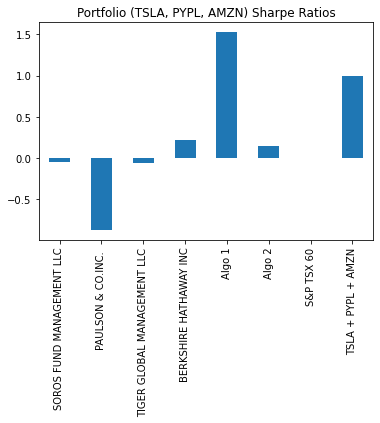

In [63]:
# Visualize the sharpe ratios as a bar plot
joined_portfolio_sharpe_ratios.plot(kind="bar", title = "Portfolio (TSLA, PYPL, AMZN) Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

Portfolio (TSLA, PYPL, AMZN) 

- Closely correlated to BH Inc. and the farthest to Algo 1
- Standard Deviation is the highest within all the analyzed portfolios
- Sharpe Ratio is the second highest after Algo 1
- Even though this portfolio does not outperform one of the the algorithmic portfolio (Algo 1) when measuring sharpe ratio, it still shows promissing results.  